In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage.draw import line, circle_perimeter, line_aa
import copy
from math import atan2
from skimage.transform import resize

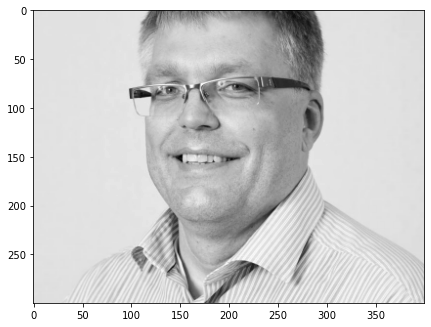

In [2]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

img = mpimg.imread("vilo2.jpg")    
img = resize(img, (300, int(300 * img.shape[1] / img.shape[0])), anti_aliasing=True)
gray = rgb2gray(img)  

plt.figure(figsize=(7,7))
plt.imshow(gray, cmap=plt.get_cmap("gray"))
plt.show()

In [3]:
gray[0][:5]

array([0.86207843, 0.86207843, 0.86207843, 0.86207843, 0.86207843])

In [4]:
height = len(gray)
width = len(gray[0])

"""
nail_step = 2
nails_top = [(0, i) for i in range(0, width, nail_step)]
nails_bot = [(height-1, i) for i in range(0, width, nail_step)]
nails_right = [(i, width-1) for i in range(1, height-1, nail_step)]
nails_left = [(i, 0) for i in range(1, height-1, nail_step)]
nails = nails_top + nails_right + nails_bot + nails_left
"""

centre = (height // 2, width // 2)
radius = min(height, width) // 2 - 1
rr, cc = circle_perimeter(centre[0], centre[1], radius)
nails = list(set([(rr[i], cc[i]) for i in range(len(cc))]))
nails.sort(key=lambda c: atan2(c[0] - centre[0], c[1] - centre[1]))
nails = nails[::4]

string_pic = np.ones((height, width))

In [5]:
len(nails)

211

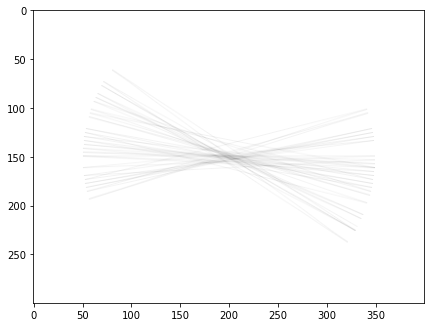

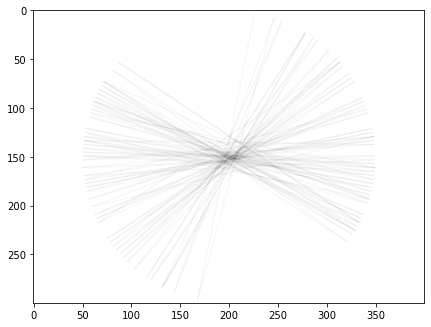

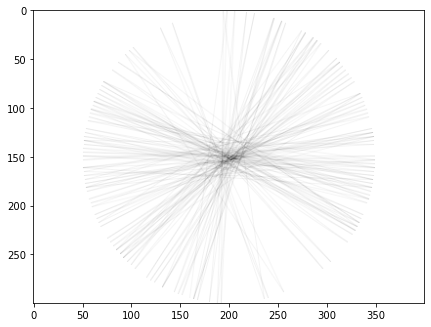

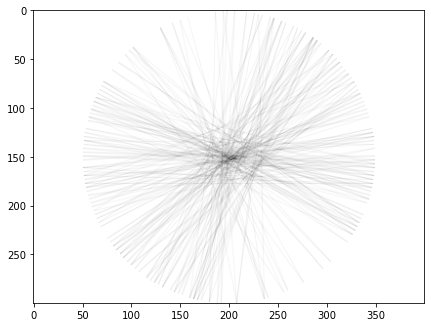

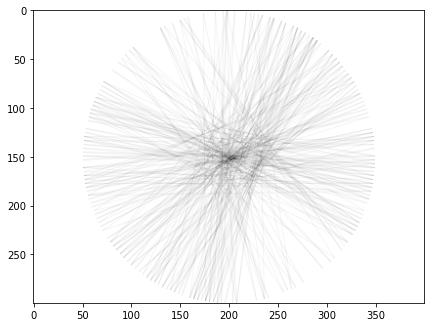

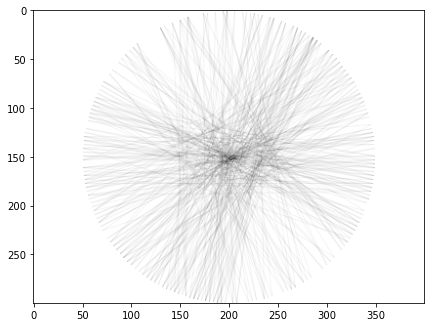

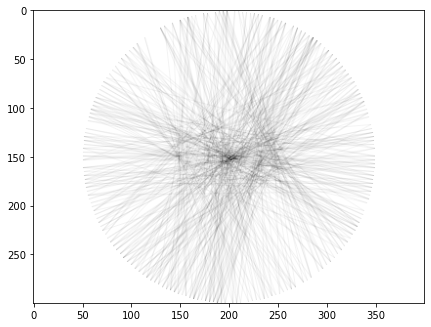

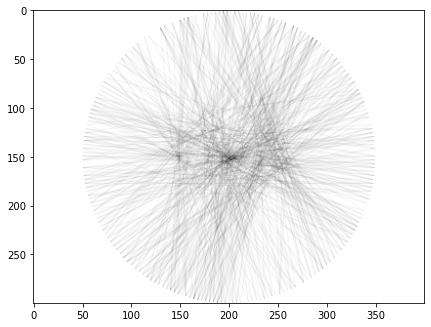

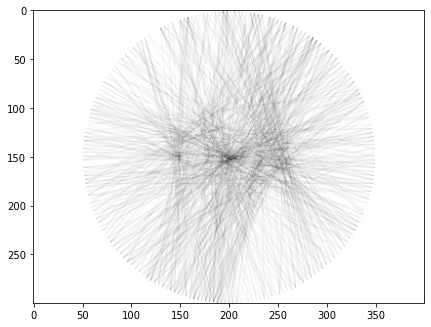

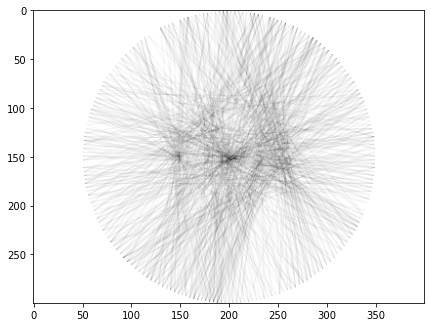

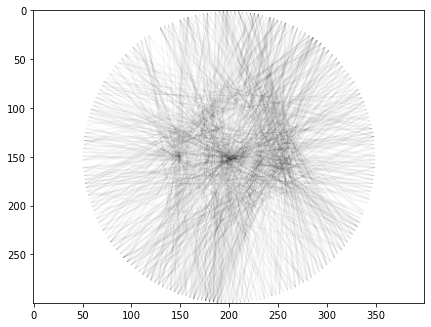

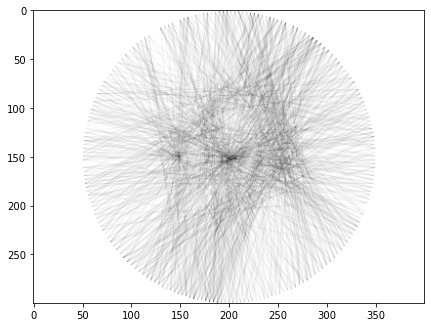

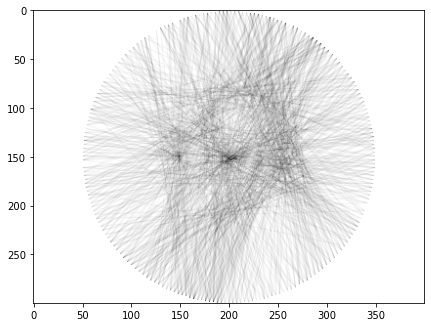

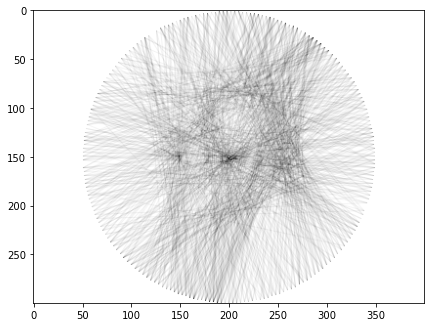

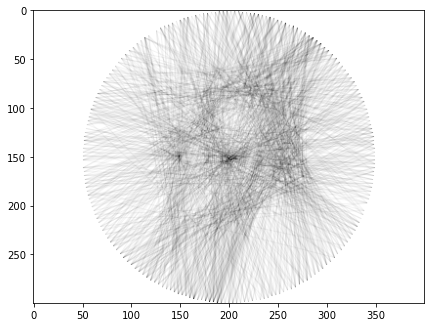

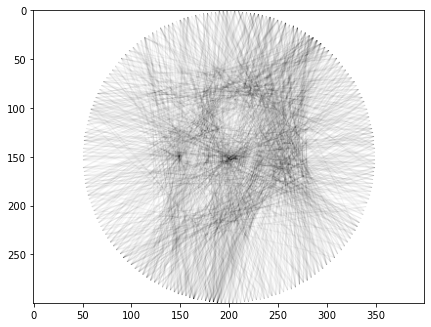

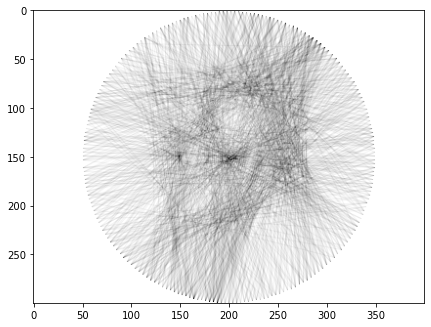

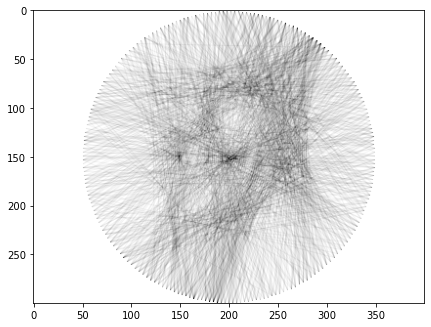

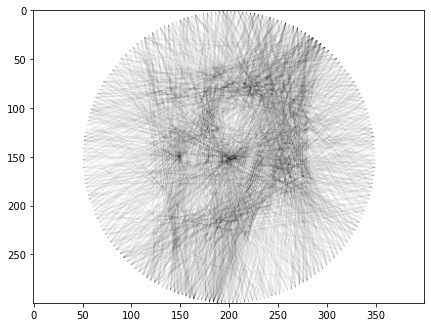

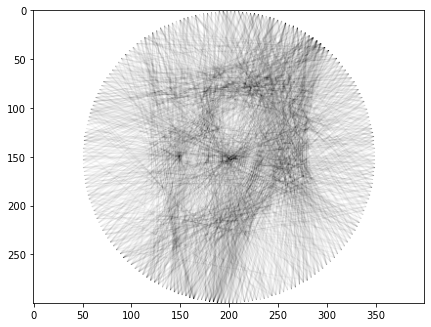

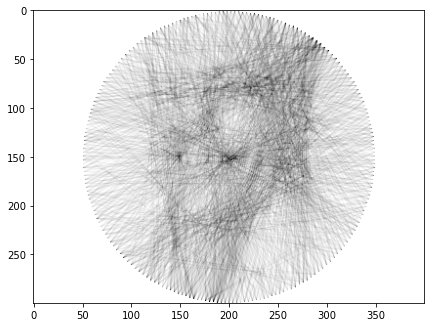

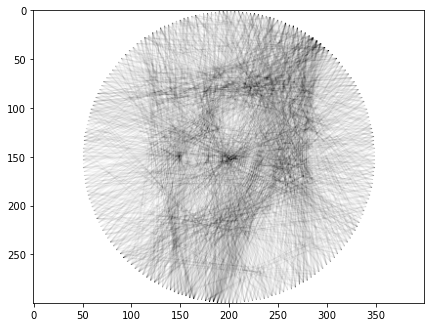

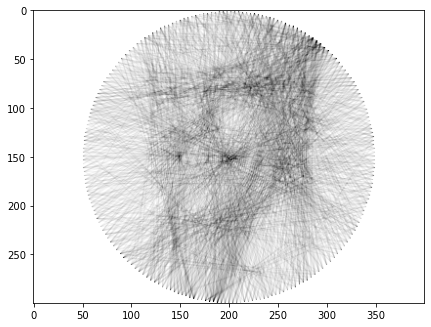

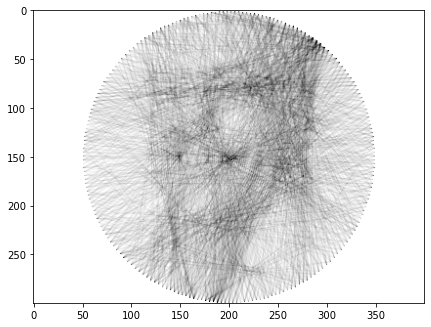

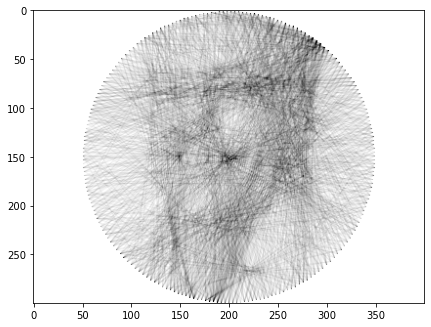

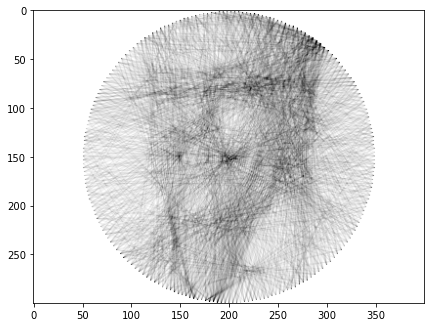

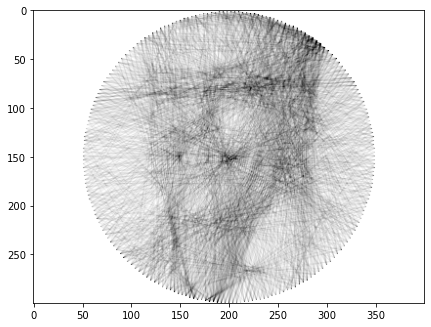

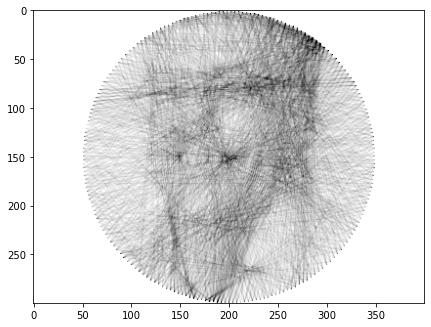

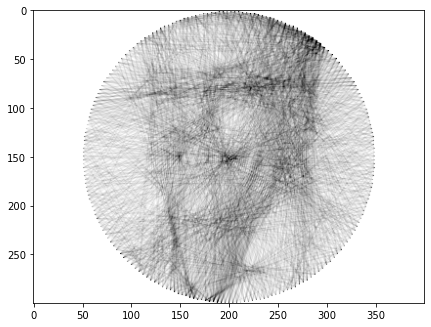

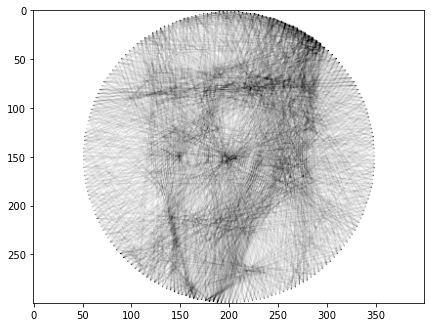

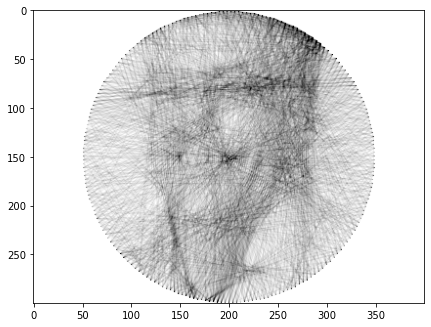

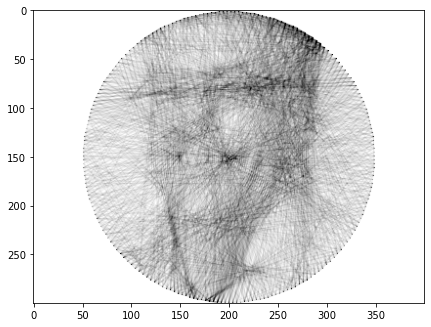

In [6]:
current_position = nails[0]
string_strength = -0.05

i = 0
while True:    
    i += 1
    
    smallest_dist = np.infty
    best_nail_position = (0,0)
    
    for nail_position in nails:
        test_pic = copy.deepcopy(string_pic)
        rr, cc, val = line_aa(current_position[0], current_position[1], nail_position[0], nail_position[1])
        test_pic[rr, cc] += string_strength * val
        test_pic[rr, cc] = np.clip(test_pic[rr, cc], a_min=0, a_max=1)
        
        distance = np.mean(np.abs(test_pic - gray))
        if distance <= smallest_dist:
            smallest_dist = distance
            best_nail_position = nail_position
     
    if i > 5000:
        break
    if smallest_dist >= np.mean(np.abs(string_pic - gray)) and i >= 100:
        break
    if i % 50 == 0:
        plt.figure(figsize=(7,7))
        plt.imshow(string_pic, cmap=plt.get_cmap("gray"), vmin=0.0, vmax=1.0)
        plt.show()
        
    rr, cc, val = line_aa(current_position[0], current_position[1], best_nail_position[0], best_nail_position[1])
    string_pic[rr, cc] += string_strength * val
    string_pic[rr, cc] = np.clip(string_pic[rr, cc], a_min=0, a_max=1)
    current_position = best_nail_position

In [7]:
i

1612

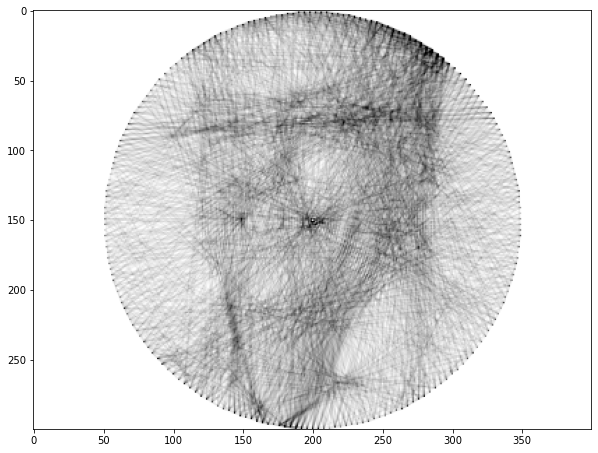

In [8]:
plt.figure(figsize=(10,10))
plt.imshow(string_pic, cmap=plt.get_cmap("gray"))
plt.show()

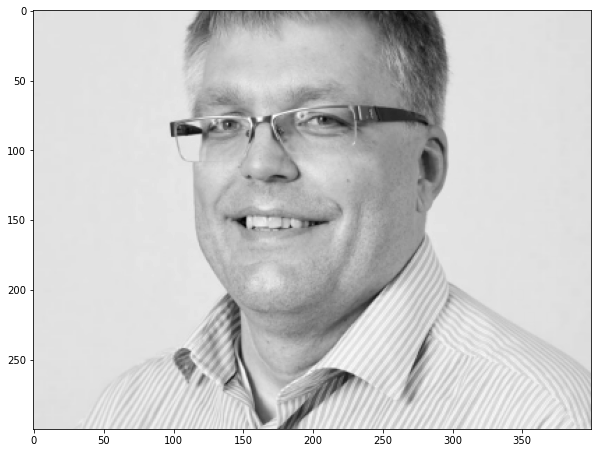

In [9]:
plt.figure(figsize=(10,10))
plt.imshow(gray, cmap=plt.get_cmap("gray"))
plt.show()